In [17]:
#* 파이썬 라이브러리 pyodbc를 사용하여 SQL Server데이터베이스를 접속하고
#  VideoShop의 VS_CUSTOMER를 가져오는(SELECT) 기능을 구현하시오.

import pyodbc
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                        "Server=.;" # 자기 PC Sql Server호출시 : .(쩜) 아니면 localhost로 설정
                        "Database=VideoShop;"
                        "uid=sa;pwd=1234")
cursor = cnxn.cursor()
cursor.execute('SELECT * FROM VS_CUSTOMER')

for row in cursor:
    #print('row = %r' % (row,))
    #print(type(row))
    print(row[1])

홍길동    
영화광    
강명훈    
이상훈    
강미영    
이존오    
홍미영    


2018-08-01 39.6


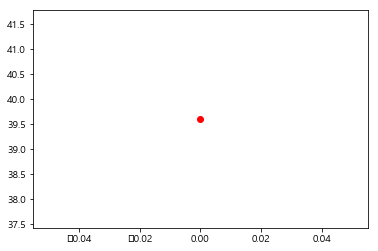

In [18]:
#* 제공된 seoul.csv를 사용하여 서울 기온데이터를 사용하여 
#   - 기상 관측 이래 가장 더웠던 날은 몇도 있는지 출력하고, 그래프로 출력하시오.
#     (plot, histgram사용)

import pandas as pd
import numpy as np

df = pd.read_csv("seoul.csv")
df.shape # (40060, 5)
df.iloc[:, -1].max() #최고온도 : 39.6
#print(len(df.iloc[:, -1].unique()), len(df.iloc[:, -1]))

max_date, max_temp = '', 0

for i in df.index:
    if df.iloc[i,-1] == 39.6:
        max_date, max_temp = df.iloc[i,0], df.iloc[i, -1]

print(max_date, max_temp)

import matplotlib.pyplot as plt
#plt.bar(max_date, max_temp)
plt.plot(max_temp, 'ro')
plt.show()

궁금한 지역 이름을 입력해주세요 : 송도1동


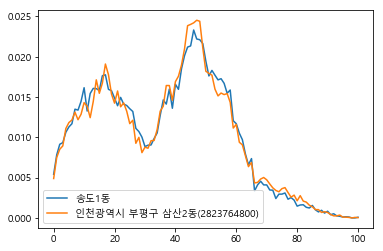

In [19]:
#* 제공된 village_poplation.csv를 사용하여 원하는 동을 입력하면 해당 동에 대한 지역의
#   인구 구조 그래프를 츨력하시오.

import csv
f = open('village_population.csv', encoding="utf-8")

data = csv.reader(f)
next(data)
next(data)
data = list(data)
pivot = []

name = input('궁금한 지역 이름을 입력해주세요 : ')

for row in data :
    if name in row[0] :
        for i in range(3,len(row)) : 
            pivot.append(int(row[i])/int(row[2]))
mn = 1

for row in data :
    s = 0
    for i in range(3, len(row)) :
        row[i] = int(row[i])/int(row[2])
        tmp = (row[i] - pivot[i-3]) ** 2
        s = s + tmp
    if s < mn and (name not in row[0]) :
        result = []
        for i in range(3, len(row)) :
            result.append(row[i])
        mn = s            
        result_name = row[0]
            
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.plot(pivot, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()

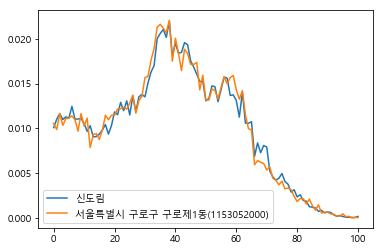

In [16]:
#* 제공된 village_poplation.csv를 사용하여 '신도림동'을 제외한 결과를 출력하시오.


import csv
f = open('village_population.csv', encoding="utf-8")

data = csv.reader(f)
next(data)
next(data)
data = list(data)
pivot = []

for row in data :
    if '신도림' in row[0] :
        for i in range(3,len(row)) : 
            pivot.append(int(row[i])/int(row[2]))
mn = 1

for row in data :
    s = 0
    for i in range(3, len(row)) :
        row[i] = int(row[i])/int(row[2])
        tmp = (row[i] - pivot[i-3]) ** 2
        s = s + tmp
    if s < mn and (name not in row[0]) :
        result = []
        for i in range(3, len(row)) :
            result.append(row[i])
        mn = s            
        #result_name = row[0]
            
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.plot(pivot, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()

In [26]:
#* 국민 청원 사이트에서 www1.president.go.kr/petitions에서 5페이지의 청원중 참여 인원이
#  3명이상인 청원을 추출하시오.

from bs4 import BeautifulSoup
import pandas as pd

import urllib.request
import urllib.parse

#url = 'https://www1.president.go.kr/petitions'
data = []
for page_index in range(1, 6):
    url = 'https://www1.president.go.kr/petitions?page=' + str(page_index)  
    
    with urllib.request.urlopen(url) as response:
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')

    board_text = soup.find_all("div",{"class": "board text"})
    bl_body = board_text[1].find("div", {"class": "bl_body"})
    titles = bl_body.find_all("div", {"class":"bl_subject"})
    agrees = bl_body.find_all("div", {"class":"bl_agree cb "})
    #print(len(titles), len(agrees))
    #title  = bl_body.find_all("div", {"class":"bl_subject"})[0]
    #for t in title.find_all('span'):
    #    title = t.next_sibling

    #print(title, agree)
    #for i in range(len(titles)):
    #    print(bl_body.find_all("div", {"class":"bl_subject"})[i].text, 
    #          bl_body.find_all("div", {"class":"bl_agree cb "})[i].text)    
    for i in range(len(titles)):
        title  = bl_body.find_all("div", {"class":"bl_subject"})[i]
        for t in title.find_all('span'):
            title = t.next_sibling

        agree = bl_body.find_all("div", {"class":"bl_agree cb "})[i]
        for a in agree.find_all('span'):
            agree = a.next_sibling

        if int(agree[0]) >= 3:
            data.append([title, int(agree[0])])

#data
df = pd.DataFrame(data, columns=['title', 'agree'])
df
# https://www1.president.go.kr/petitions
# 청원수가 1명이상인것을 추출하시오.

,title,agree
0,게임물 등급제도에 의한 게임 이용 나이 제한을 더욱 ...,4
1,여성가족부를 폐지 시켜주십시오.,5
2,중소기업 살리기 노력하신다면서요....너무 힘들게 하 ...,3
3,https 차단 금지를 풀어주십시오 진짜 공산국을 보는 ...,4
4,문재인은 여전히 세금으로 해외방문에 열중,6
5,무눙한 변호사 출신 대통령 반대한다,8
6,차량사고 보험비뜯는 사기꾼,3
7,경찰의 비리 제보자 입니다!.꼭 보십시오.,5
8,"생리대 금지반대에 관한 악플러들, 처벌해주세요.",3
9,반려동물도 보험이 되게 해주세요,5


In [ ]:
#* 제공된 pop_seoul.csv사용하여 서울시 구별 CCTV 현황을 분석하시오.
#  - 서울시 각 구별로 CCTV수를 파악하고, 인구대비 CCTV비율을 파악해서 순위를 비교하시오.

In [ ]:
#* 제공된 crime_seoul.csv를 사용하여 서을 특별시의 강도검거율이 100이상인 지역을 출력하시오. 